<a href="https://colab.research.google.com/github/kidd89/imbalanced-dataset/blob/main/IMBALANCED_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

class 0: 573518
class 1: 21694
proportion class 0: 2643.67 %


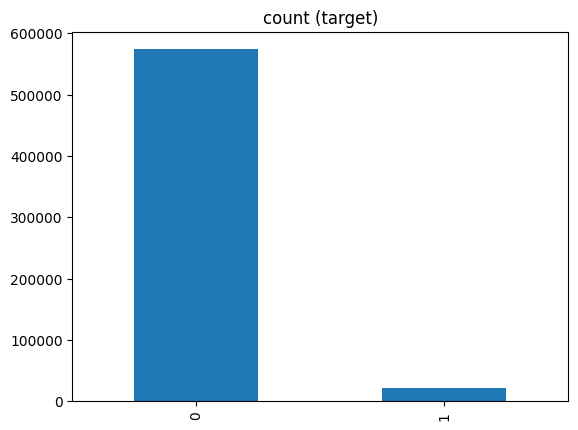

In [ ]:
import numpy as np
import pandas as pd

df_train = pd.read_csv("/content/train.csv")

df_train

target_count = df_train.target.value_counts()
print("class 0:", target_count[0])
print("class 1:", target_count[1])
print('proportion class 0:',round(target_count[0]*100/(target_count[1]),2),'%')
target_count.plot(kind = 'bar',title = 'count (target)');


In [ ]:
df_train #its a masked data= it means they covered these data into binary terms
         # these masked data used in finanace and healthcare industry

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


## The metric trap

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#remove 'id' and 'target' columns

labels = df_train.columns[2:]#taking from after 'target' column that is after second column is one variable
df_train = df_train.dropna() # droping null values

x = df_train[labels]# is my x variable
y = df_train['target'] #is my target variable

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :", (accuracy * 100.0))

Accuracy : 91.98608906025554


## confusion matrix

confusion_matrix :
 [[109222   5552]
 [  3988    281]]


<ipython-input-26-1bf8b0ecbac0>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-26-1bf8b0ecbac0>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


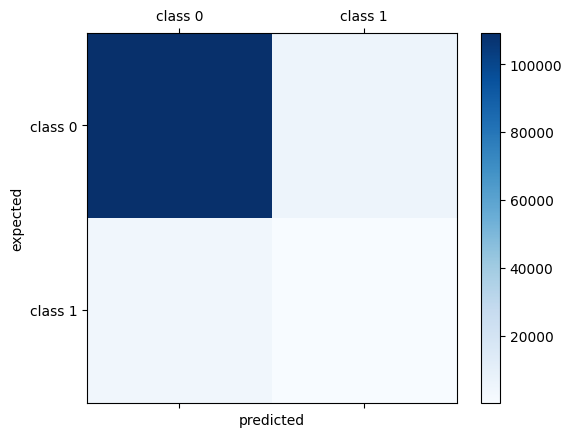

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print("confusion_matrix :\n",conf_mat)

labels = ['class 0','class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel("predicted")
plt.ylabel("expected")
plt.show() # so this confusion metrics show class 1 is low data points so this model look like biased ,previously when we used decisiontree classifer
          # it shows 91% as it is this model looks good but its not because its biased


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,model.predict_proba(x_test[['ps_ind_05_cat']])[:,1]) # the model is given as pass ,not the best model

##Resampling

now we found the problem so we now use the solution for resampleing as "oversmapling" and "undersampling"

we need to download the package which use to help for imbalanced data

In [ ]:
!pip install imblearn

In [ ]:
import imblearn

for ease visualization, lets create small unbalanced sample dataset using the make_classification method:

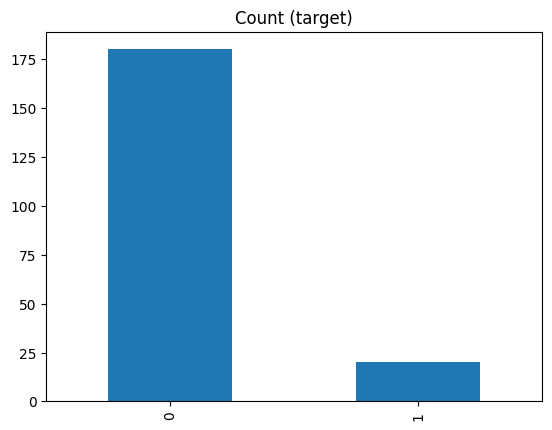

In [ ]:
from sklearn.datasets import make_classification #subpackage used for creating own classification dataset
import pandas as pd

#generate some fake classification dataset
X, y = make_classification(
    n_classes=2, class_sep=0.75, weights=[0.9, 0.1],
    n_informative=2, n_redundant=0, flip_y=0,
    n_features=2, n_clusters_per_class=2,
    n_samples=200, random_state=10
)
df = pd.DataFrame(X)
df['target'] = y
df
df.target.value_counts().plot(kind='bar', title='Count (target)');



In [ ]:
df

,0,1,target
0,0.157423,-0.374667,0
1,-0.909752,0.037925,0
2,-0.944869,-1.136125,0
3,-0.883279,-1.362500,0
4,-0.022943,1.015924,0
...,...,...,...
195,-0.272900,0.923791,0
196,-0.880549,-0.633844,0
197,-1.186294,0.943099,0
198,-1.158688,-0.399660,0


we will also create 2-dimensional plot function,plot_2d_space,to see the data distribution

In [ ]:
def plot_2d_space(X,y, label='classes'):
  colors=["#1F77B4","#FF7F0E"]
  markers=['o','s']
  for l, c, m in zip(np.unique(y),colors,markers):
      plt.scatter(
        X[y==l, 0],
        X[y==l, 1],
        c=c , label=l, marker=m
        )
  plt.title(label)
  plt.legend(loc="upper right")
  plt.show()


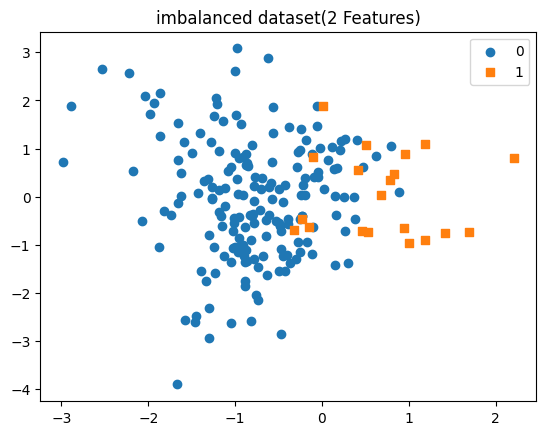

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plot_2d_space(X,y,'imbalanced dataset(2 Features)')#blue is majority class and orange is minority class

after previous blue and orange imbalance dataset,now lets try and balance the dataset

Random undersampling and oversampling with imbalanced-learn

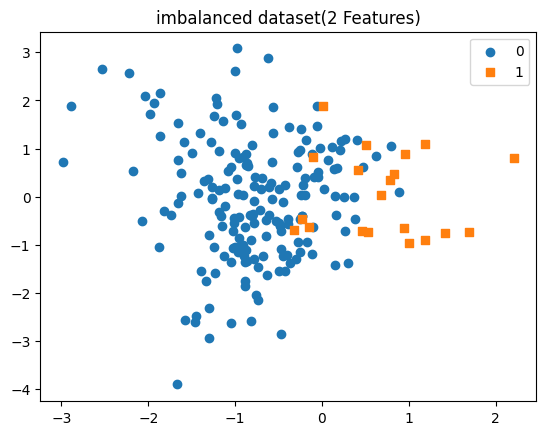

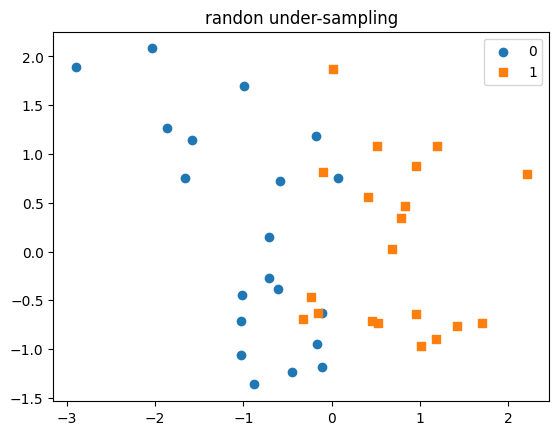

In [ ]:

from imblearn.under_sampling import RandomUnderSampler #import
rus = RandomUnderSampler() #intialise the model
x_rus,y_rus = rus.fit_resample(X,y)#resampling the data


plot_2d_space(X,y,'imbalanced dataset(2 Features)')
plot_2d_space(x_rus,y_rus,'randon under-sampling')

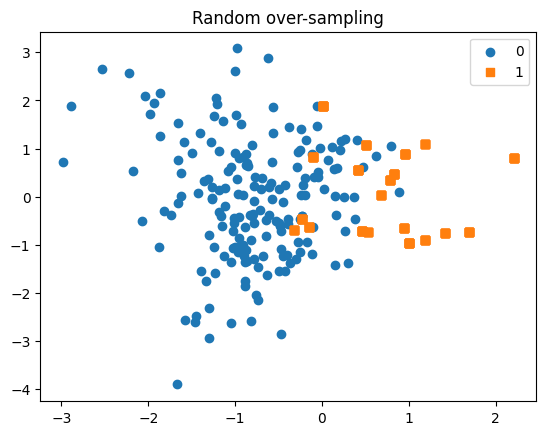

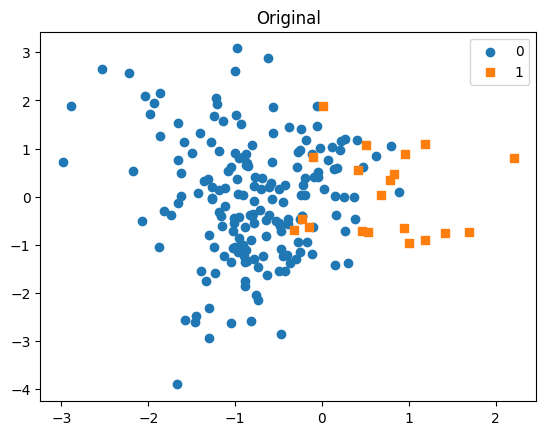

In [ ]:
from imblearn.over_sampling import RandomOverSampler # import over sampler

ros = RandomOverSampler() #Initialis the model
X_ros, y_ros = ros.fit_resample(X, y) #Fit the model

#print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')
plot_2d_space(X, y, 'Original')

In [ ]:
y_ros.sum(),y.sum(),y_rus.sum()

(180, 20, 20)

now balancing the dataset with Under-Sampling:Cluster Centroids

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


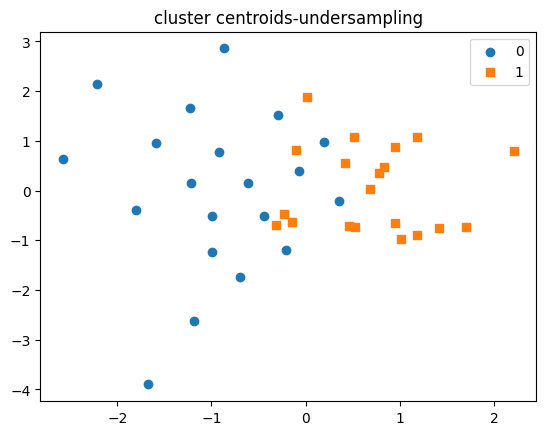

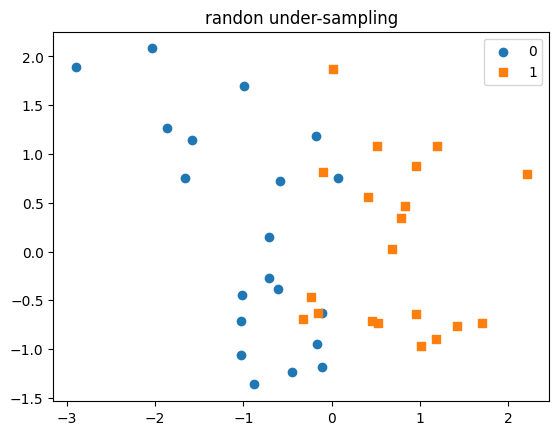

In [ ]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(sampling_strategy={0:20})#we want 20 data points in class 0 and rest of the data points in class 1
                                               #becoz class 0 have 180 data points we take only 20 data point and class 1 we will take all the points
X_cc,y_cc = cc.fit_resample(X,y)

plot_2d_space(X_cc,y_cc,'cluster centroids-undersampling')
plot_2d_space(x_rus,y_rus,'randon under-sampling')


In [ ]:
y_cc.sum()/y_cc.shape[0]

0.5

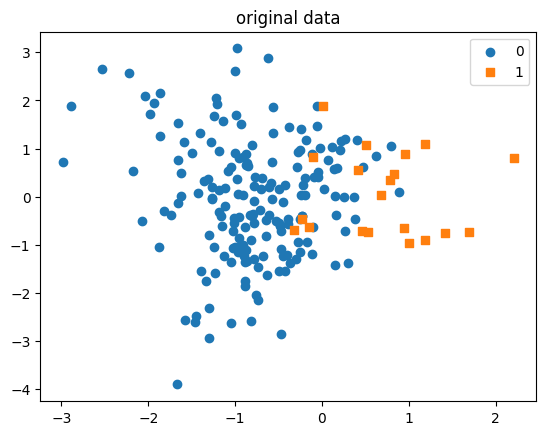

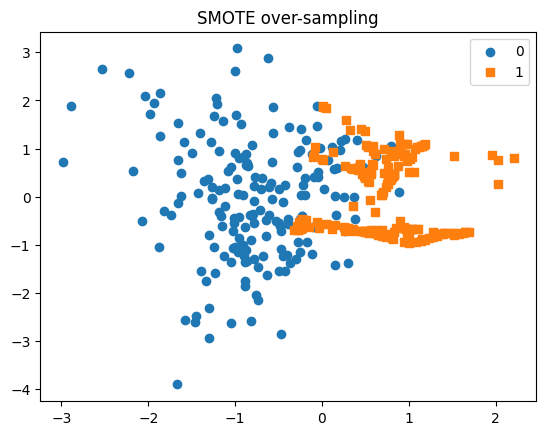

In [ ]:
from imblearn.over_sampling import SMOTE

plot_2d_space(X,y,'original data')

smote = SMOTE(sampling_strategy='minority')
X_sm,y_sm = smote.fit_resample(X,y)

plot_2d_space(X_sm,y_sm,'SMOTE over-sampling')

OVER-SAMPLING followed by UNDER-SAMPLING

NOW,we will do combination of over-sampling and under-sampling,using the SMOTE and tomek links techniques

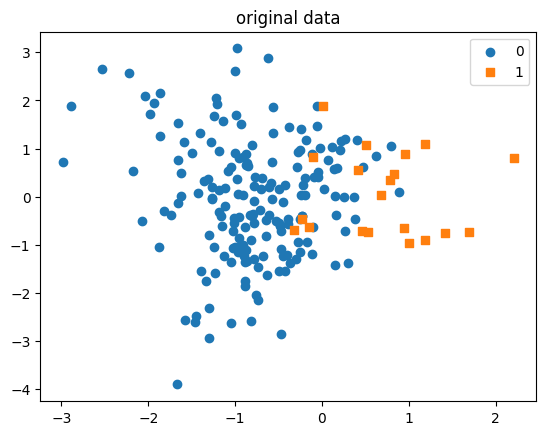

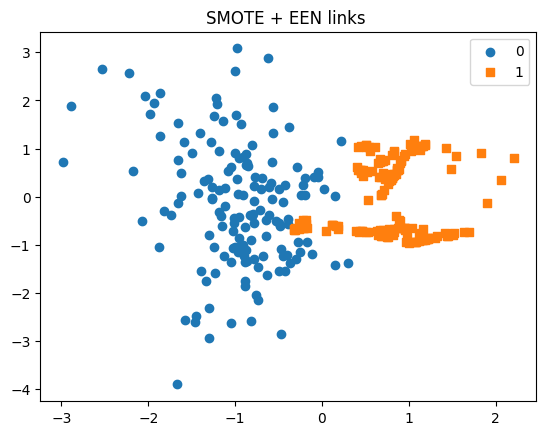

In [ ]:
from imblearn.combine import SMOTEENN

plot_2d_space(X,y,'original data')

smt = SMOTEENN(sampling_strategy='all')
X_smt,y_smt = smt.fit_resample(X,y)

plot_2d_space(X_smt,y_smt,'SMOTE + EEN links ')

after SMOTEEN we should check with machine algorithem to see what sort of result we getting

wen we have balanced data we clean,encode,split,and finally we do ML algorithim so in this ,it has been imbalanced data,now we balanced the data so after that, we doing machine algorithim in which as logisticregression

we are only training the model on the balanced data in which lr.fit(X_smt,y_smt)
,we are testing the complete dataset lr.score(X,y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()
lr.fit(X_smt,y_smt)
lr.score(X,y)

print('AUROC on the sampled dataset:', roc_auc_score(y,lr.predict_proba(X)[:,1]))

AUROC on the sampled dataset: 0.9513888888888888
